# Set up the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import data

In [2]:
pg_data = sns.load_dataset('penguins')
pg_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Data Exploration

In [3]:
features = pg_data.columns

# determine numbers of missing values in each column
for feature in features:
    nonvalue = pg_data[feature].isnull().sum()
    print({feature: nonvalue})

{'species': 0}
{'island': 0}
{'bill_length_mm': 2}
{'bill_depth_mm': 2}
{'flipper_length_mm': 2}
{'body_mass_g': 2}
{'sex': 11}


In [4]:
pg_data.shape

(344, 7)

# Data cleaning

In [5]:
pg_new = pg_data.dropna() #remove all rows with null values
pg_new.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Seaborn styling

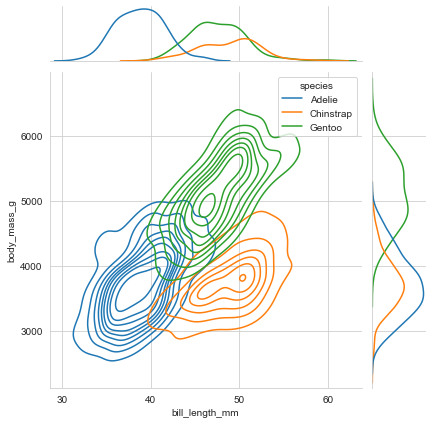

<Figure size 720x360 with 0 Axes>

In [6]:
sns.set_style('whitegrid')

#an example plot
sns.jointplot(x = 'bill_length_mm', 
              y = 'body_mass_g', 
              data=pg_new, 
              hue = 'species',
              kind='kde')
#styling code
plt.figure(figsize=(10, 5)) #size of the figure
sns.set_context('paper', font_scale = 1.5) #font size and arrangment style
sns.despine(left=False, bottom=False) #remove borderlines of the graph (the axes)


# 1. Distribution plot

/Users/linh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='body_mass_g'>

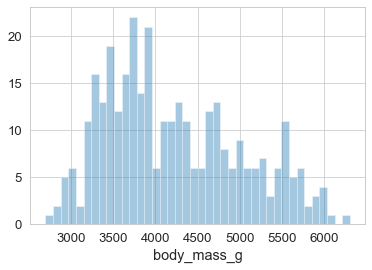

In [7]:
sns.distplot(pg_new['body_mass_g'], kde=False, bins=40)

 ##  a. Joint plot

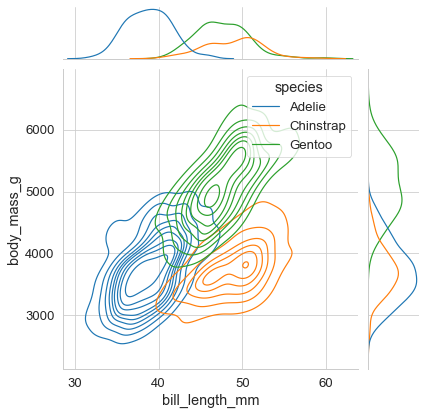

In [8]:
sns.jointplot(x = 'bill_length_mm', 
              y = 'body_mass_g', 
              data=pg_new, 
              hue = 'species',
              kind='kde')

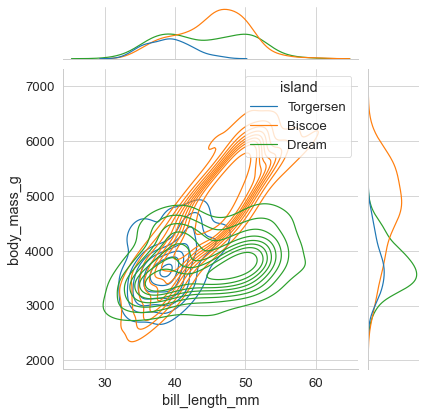

In [9]:
sns.jointplot(x = 'bill_length_mm', 
              y = 'body_mass_g', 
              data=pg_new, 
              hue = 'island',
              kind='kde')

## b. KDE plot

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

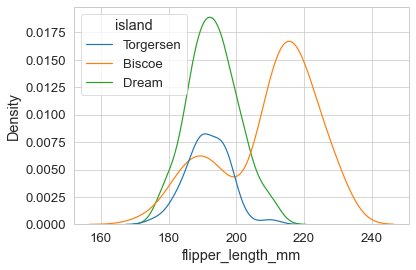

In [10]:
sns.kdeplot(pg_new['flipper_length_mm'], 
            hue = pg_new['island'])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

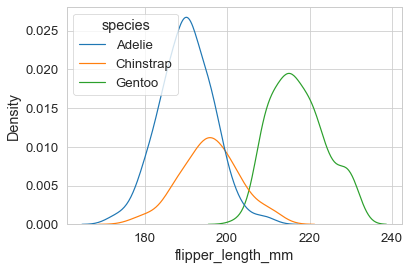

In [11]:
sns.kdeplot(pg_new['flipper_length_mm'], 
            hue = pg_new['species'])

## c. Pair plots

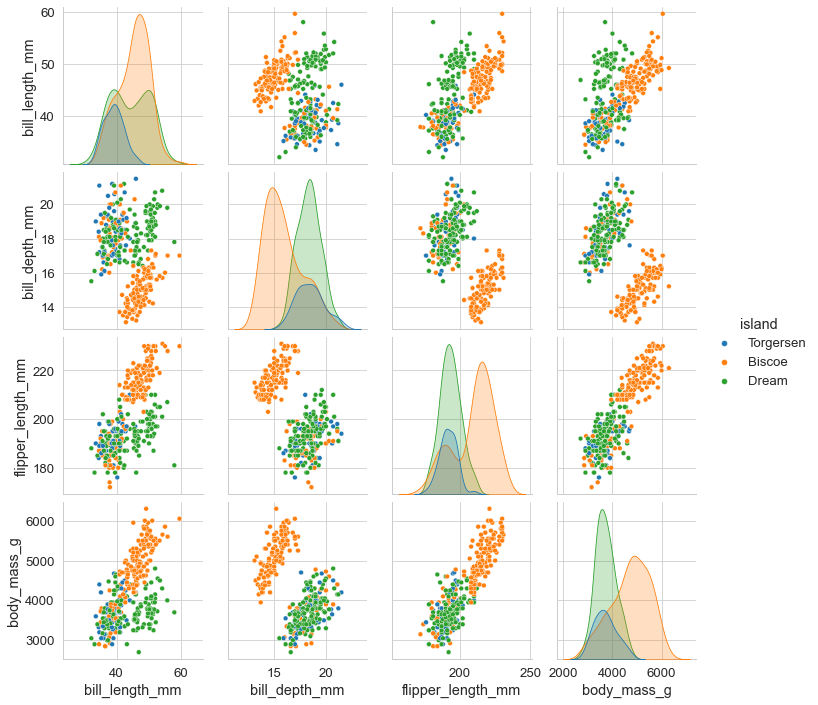

In [12]:
sns.pairplot(pg_new, hue = 'island')

## d. Rug plot (not used very much)

<AxesSubplot:xlabel='body_mass_g'>

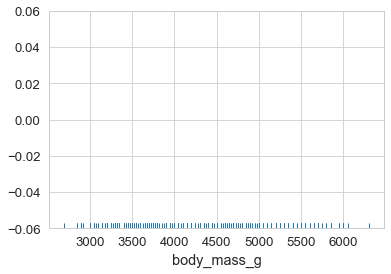

In [13]:
sns.rugplot(pg_new['body_mass_g'])

# 2. Categorical plots

## a. Bar plots

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

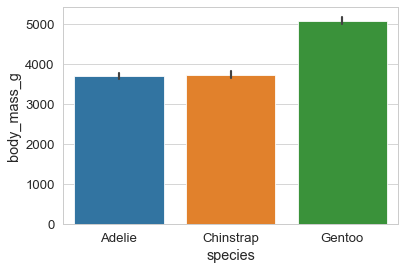

In [14]:
sns.barplot(x = 'species', y = 'body_mass_g', 
            data = pg_new, 
            estimator=np.mean #using the mean number for each bar
           )

## b. Count plots

<AxesSubplot:xlabel='species', ylabel='count'>

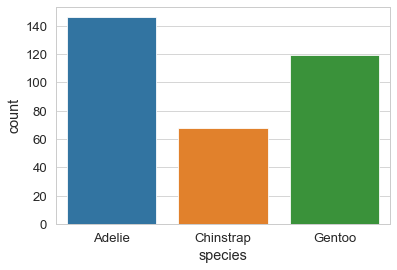

In [15]:
sns.countplot(x = 'species', 
              data=pg_new) #simply based on number counted for each bar

## c. Box plots

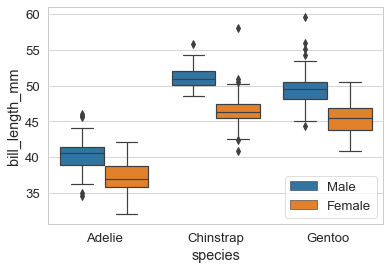

In [16]:
sns.boxplot(x = 'species', y = 'bill_length_mm',
           data = pg_new,
           hue = 'sex')
plt.legend(loc='lower right')

## d. Violin plot

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

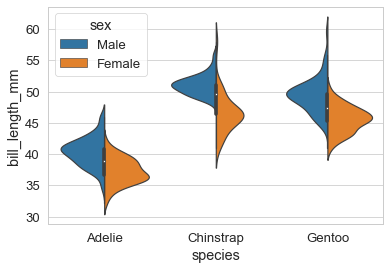

In [17]:
sns.violinplot(x = 'species', y = 'bill_length_mm',
           data = pg_new,
           hue = 'sex', split = True)

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

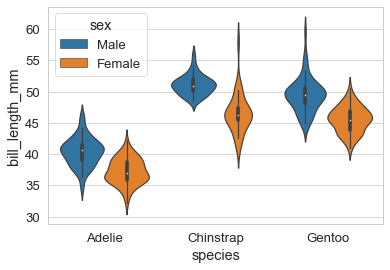

In [18]:
sns.violinplot(x = 'species', y = 'bill_length_mm',
           data = pg_new,
           hue = 'sex')

## e. Strip plot

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

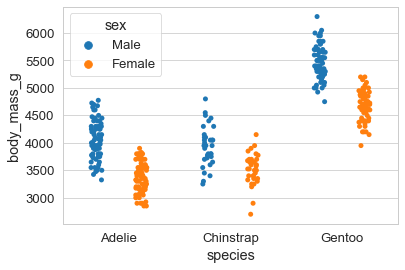

In [19]:
sns.stripplot(x = 'species',
             y = 'body_mass_g',
             data = pg_new,
             jitter = True, #spread datapoints out
             hue = 'sex',
              dodge = True) #seperate hue

## f. Palettes

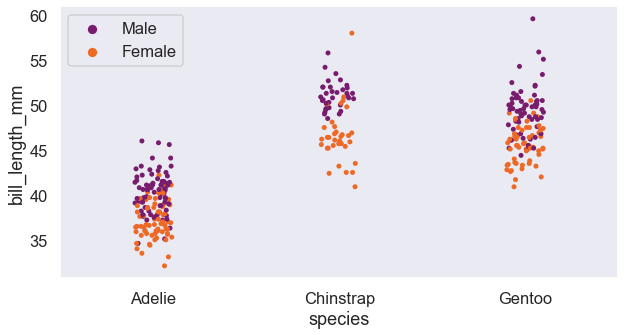

In [43]:
plt.figure(figsize = (10,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x = 'species', y = 'bill_length_mm', 
              data = pg_new, hue = 'sex', 
              palette = "inferno")
plt.legend(loc=2)

# 3. Matrix Plots

## a. Heatmaps

In [28]:
plt.figure(figsize = (8,6))
sns.set_context('paper', 
                font_scale=1.4)

pg_mx = pg_new.corr() #getting a correlation dataset by using columns as indices
pg_mx

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Figure size 576x432 with 0 Axes>

Let's create a heatmap.

<AxesSubplot:>

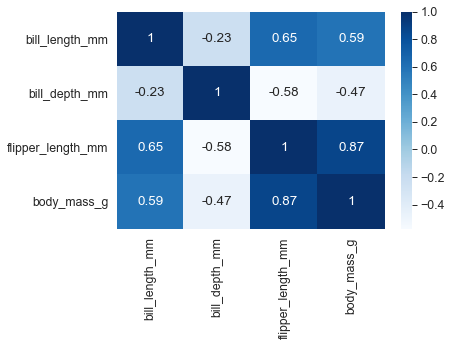

In [32]:
sns.heatmap(pg_mx, annot=True, cmap="Blues")

In [38]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index = 'month', 
                              columns = 'year', 
                              values = 'passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

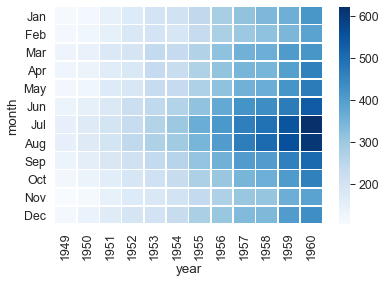

In [42]:
sns.heatmap(flights, 
            cmap="Blues", 
            linecolor='white', 
            linewidth=0.5)

## b. Cluster Maps